In [54]:
import os
import pandas as pd
import numpy as np
import gdown
import string
import matplotlib.pyplot as plt

In [2]:
name = 'data_crawling_berita_antaranews.csv'
gdown.download(f'https://drive.google.com/uc?id=1iuY-raVaRjcwV63Ua8fIGa9dC01yvPvQ', name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1iuY-raVaRjcwV63Ua8fIGa9dC01yvPvQ
To: /content/data_crawling_berita_antaranews.csv
100%|██████████| 1.88M/1.88M [00:00<00:00, 98.2MB/s]


'data_crawling_berita_antaranews.csv'

In [3]:
data = pd.read_csv("data_crawling_berita_antaranews.csv")
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik
2,"Senin, 30 Oktober 2023 00:11 WIB",NaN,Din Syamsuddin ajak warga Muhammadiyah tak apa...,ANTARA - Tokoh Muhammadiy...,politik
3,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik
4,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik
...,...,...,...,...,...
715,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga
716,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga
717,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga
718,"Senin, 23 Oktober 2023 15:11 WIB",NaN,"Lepas kontingen futsal putra U-18, Babel optim...",ANTARA - Pemerintah Provinsi Kepulauan Bangka ...,olahraga


In [4]:
data.isna().sum()

Tanggal     0
Penulis    81
Judul       4
Artikel    38
Label       0
dtype: int64

In [5]:
data = data.dropna()
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik
3,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik
4,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik
5,"Minggu, 29 Oktober 2023 22:45 WIB",Pewarta: Hendri Sukma IndrawanEditor: Didik Ku...,Wakil Ketua MPR: Pilpres adalah kontestasi put...,Jakarta (ANTARA) - Wakil Ketua Majelis Pe...,politik
...,...,...,...,...,...
714,"Senin, 23 Oktober 2023 15:49 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Suparni sebut medali perak di Hangzhou pertaja...,"Hangzhou, China (ANTARA) - Atlet Para atl...",olahraga
715,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga
716,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga
717,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga


In [6]:
data.duplicated().sum()

2

In [26]:
data = data.drop_duplicates()
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik
3,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik
4,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik
5,"Minggu, 29 Oktober 2023 22:45 WIB",Pewarta: Hendri Sukma IndrawanEditor: Didik Ku...,Wakil Ketua MPR: Pilpres adalah kontestasi put...,Jakarta (ANTARA) - Wakil Ketua Majelis Pe...,politik
...,...,...,...,...,...
714,"Senin, 23 Oktober 2023 15:49 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Suparni sebut medali perak di Hangzhou pertaja...,"Hangzhou, China (ANTARA) - Atlet Para atl...",olahraga
715,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga
716,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga
717,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga


In [27]:
dataartikel = data['Artikel']
dataartikel

0           Jakarta (ANTARA) - Politikus PDI Perjuang...
1           Jakarta (ANTARA) - Lima berita politik pa...
3           Jakarta (ANTARA) - Sekretaris Jenderal PK...
4           Jakarta (ANTARA) - Sekretaris Jenderal (S...
5           Jakarta (ANTARA) - Wakil Ketua Majelis Pe...
                             ...                        
714         Hangzhou, China (ANTARA) - Atlet Para atl...
715         Medan (ANTARA) - Atlet Para atletik asal ...
716         Xiaoshan, China (ANTARA) - Asisten pelati...
717         Hangzhou, China (ANTARA) - Pelari Saptoyo...
719         Jakarta (ANTARA) - Novak Djokovic dan Iga...
Name: Artikel, Length: 637, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Assuming 'Label' is the column you want to encode
label_encoder = LabelEncoder()
data['Label encod'] = label_encoder.fit_transform(data['Label'])


In [30]:
data

,Tanggal,Penulis,Judul,Artikel,Label,Label encod
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik,2
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik,2
3,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik,2
4,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik,2
5,"Minggu, 29 Oktober 2023 22:45 WIB",Pewarta: Hendri Sukma IndrawanEditor: Didik Ku...,Wakil Ketua MPR: Pilpres adalah kontestasi put...,Jakarta (ANTARA) - Wakil Ketua Majelis Pe...,politik,2
...,...,...,...,...,...,...
714,"Senin, 23 Oktober 2023 15:49 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Suparni sebut medali perak di Hangzhou pertaja...,"Hangzhou, China (ANTARA) - Atlet Para atl...",olahraga,1
715,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga,1
716,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga,1
717,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga,1


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vektorisasi teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataartikel)


In [53]:
from sklearn.cluster import KMeans

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 3

## Klastering menggunakan K-Means
kmeans = KMeans(n_clusters=jumlah_klaster, init='k-means++', random_state=42)
hasil = kmeans.fit_predict(tfidf_matrix)
hasil


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [73]:
# Geser label hasil klastering jika diperlukan
print(list(data['Label encod']))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [71]:
labels_encoded_shifted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 4, 4, 3, 3, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 3, 2, 4, 4, 3, 4, 4, 3, 3, 4, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [65]:
print(list(labels_encoded_shifted))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

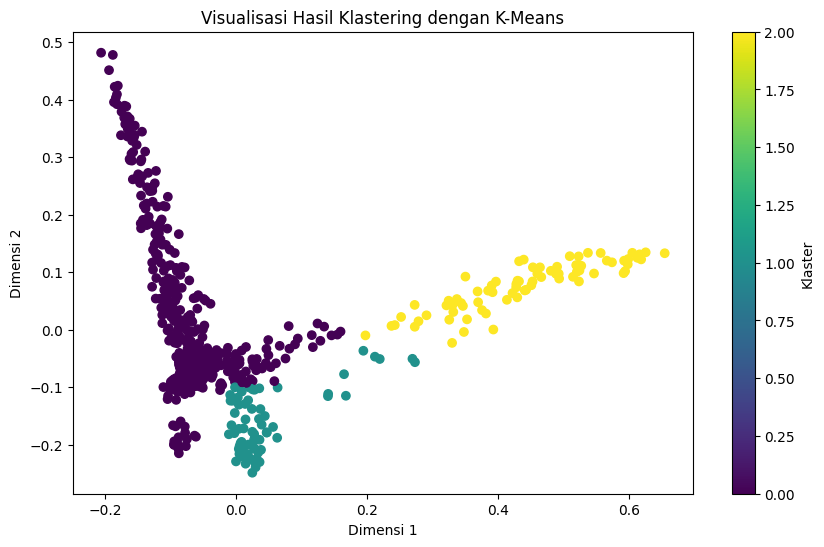

In [56]:
# Plot hasil klastering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=hasil, cmap='viridis')
plt.title('Visualisasi Hasil Klastering dengan K-Means')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.colorbar(scatter, label='Klaster')
plt.show()

In [70]:
from sklearn.metrics import adjusted_rand_score

# Misalnya label sebenarnya tersedia dalam variabel 'label_sebenarnya'
# Anda perlu mengganti 'label_sebenarnya' dengan label sebenarnya dari data Anda
label_sebenarnya = data['Label encod']

# Hitung ARI
ari = adjusted_rand_score(data['Label encod'],labels_encoded_shifted)
print(f'Adjusted Rand Index (ARI): {ari}')


Adjusted Rand Index (ARI): 0.18875657533684123


In [58]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(tfidf_matrix, hasil)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.0218662112582331
